# Senitment Analysis using GloVe and BiLSTM

Importing dependencies and Reading dataset

In [38]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [39]:
df=pd.read_csv('labelled.csv')

In [41]:
df.tail()

,Unnamed: 0,Index,Name,review,preprocessed_review,label
91,91,94,Amazon CUstomer,Good deal and a value for money product. Happy...,good deal value money product happy performance,1
92,92,95,Amazon CUstomer,This is first time i am using iPhone. Initial ...,first time using iphone initial day missing fe...,1
93,93,96,Amazon CUstomer,Phone�s a little heavy and rest of the things ...,phone little heavy rest thing good got pretty ...,1
94,94,97,Amazon CUstomer,On a serious note I am in love with this phone...,serious note love phone first phone probably b...,1
95,95,98,Amazon CUstomer,to know about the iPhone delivery by amazon. t...,know iphone delivery amazon issue seal packed ...,1


WordCloud

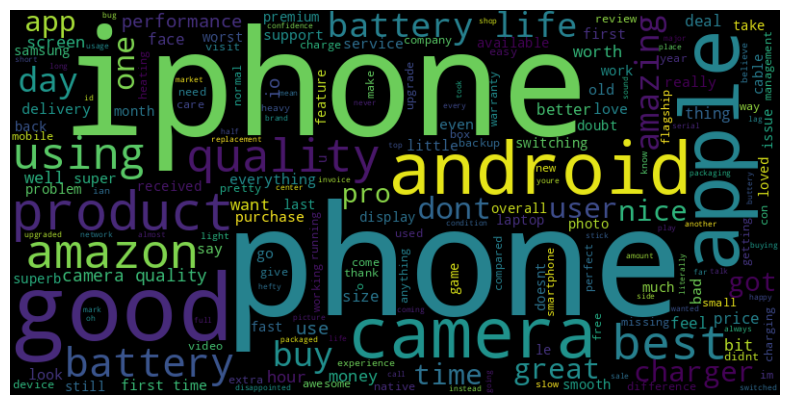

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a list of words or use your own text data
words = df['preprocessed_review']

# Join the words into a single string
text = ' '.join(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Sentiment Analysis

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the maximum sequence length
max_sequence_length = 100

# Preprocess the dataset
def preprocess_dataset(X, y):
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(X)
    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X, maxlen=max_sequence_length)
    y = np.array(y)
    return X, y, tokenizer

# Define the BiLSTM model
def create_model(vocab_size):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Load the dataset
X=df['preprocessed_review']
y=df['label']

# Preprocess the dataset
X, y, tokenizer = preprocess_dataset(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [43]:
# Create the BiLSTM model
model = create_model(vocab_size=len(tokenizer.word_index) + 1)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
3/3 [==============================] - 8s 1s/step - loss: 0.6806 - accuracy: 0.6279 - val_loss: 0.6373 - val_accuracy: 0.9000
Epoch 2/10
3/3 [==============================] - 0s 170ms/step - loss: 0.6225 - accuracy: 0.8837 - val_loss: 0.5623 - val_accuracy: 0.9000
Epoch 3/10
3/3 [==============================] - 0s 159ms/step - loss: 0.5411 - accuracy: 0.8837 - val_loss: 0.4389 - val_accuracy: 0.9000
Epoch 4/10
3/3 [==============================] - 0s 176ms/step - loss: 0.4091 - accuracy: 0.8837 - val_loss: 0.3121 - val_accuracy: 0.9000
Epoch 5/10
3/3 [==============================] - 0s 165ms/step - loss: 0.3632 - accuracy: 0.8837 - val_loss: 0.3506 - val_accuracy: 0.9000
Epoch 6/10
3/3 [==============================] - 0s 151ms/step - loss: 0.3713 - accuracy: 0.8837 - val_loss: 0.3233 - val_accuracy: 0.9000
Epoch 7/10
3/3 [==============================] - 0s 164ms/step - loss: 0.3456 - accuracy: 0.8837 - val_loss: 0.3046 - val_accuracy: 0.9000
Epoch 8/10
3/3 [=======

1/1 [==============================] - 1s 812ms/step


In [46]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy*100, "%")

1/1 [==============================] - 0s 53ms/step - loss: 0.2935 - accuracy: 0.9000
Loss: 0.29349368810653687
Accuracy: 89.99999761581421 %
